In [2]:
# import libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Data/Real_combined_file.csv')

In [4]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


In [5]:
df.shape

(1105, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       1105 non-null   float64
 1   TM      1105 non-null   float64
 2   Tm      1105 non-null   float64
 3   H       1105 non-null   int64  
 4   VV      1105 non-null   float64
 5   V       1105 non-null   float64
 6   VM      1105 non-null   float64
 7   PM 2.5  1103 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 69.2 KB


In [14]:
df.isnull().sum()

T         0
TM        0
Tm        0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [8]:
df.dtypes

T         float64
TM        float64
Tm        float64
H           int64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

<AxesSubplot:>

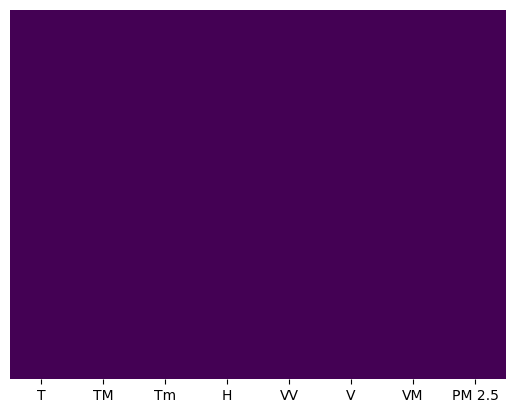

In [9]:
# Checking for null values:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# Splitting the dataset:

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [12]:
X

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59,6.3,4.3,5.4
1,22.4,30.3,16.9,57,6.9,3.3,7.6
2,24.0,31.8,16.9,51,6.9,2.8,5.4
3,22.8,30.2,17.6,55,7.7,3.7,7.6
4,23.1,30.6,17.4,46,6.9,3.3,5.4
...,...,...,...,...,...,...,...
1098,22.2,27.7,17.7,63,6.9,2.8,7.6
1099,22.7,28.4,18.1,65,6.3,3.9,5.4
1100,23.4,29.1,18.4,62,6.0,5.7,9.4
1101,23.8,30.2,17.7,56,5.5,6.1,9.4


In [13]:
y

0       284.795833
1       219.720833
2       182.187500
3       154.037500
4       223.208333
           ...    
1098    188.041667
1099    310.250000
1100    204.375000
1101    223.250000
1102    248.958333
Name: PM 2.5, Length: 1103, dtype: float64

In [15]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347038
TM,0.869258,1.000000,0.478298,-0.636506,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636506,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM 2.5,-0.347038,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


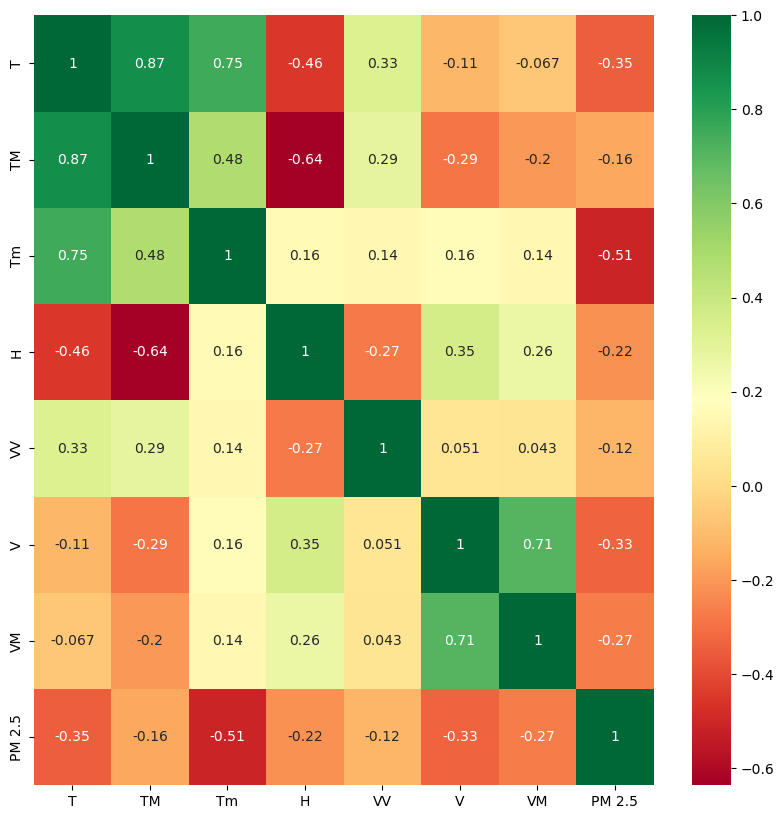

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [31]:
from xgboost import XGBRegressor

In [32]:
xgr = XGBRegressor()

In [33]:
xgr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xgr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.996153185067431


In [35]:
print("Coefficient of determination R^2 <-- on test set: {}".format(xgr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.3110683734725529


In [37]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgr,X,y,cv=5)

In [39]:
score

array([ 0.20010711, -0.06473245,  0.37784528,  0.20518351,  0.15548865])

## Model Evaluation

In [41]:
prediction=xgr.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

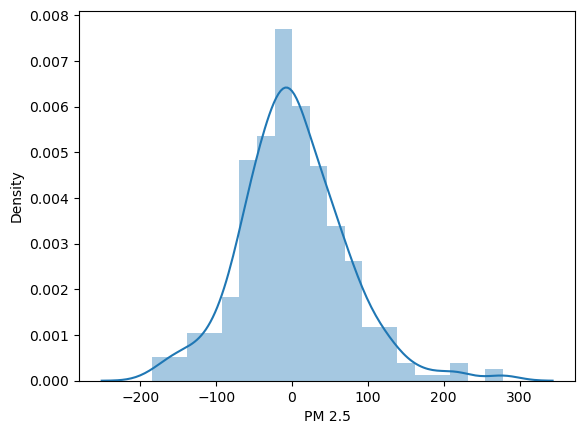

In [43]:
sns.distplot(y_test-prediction)

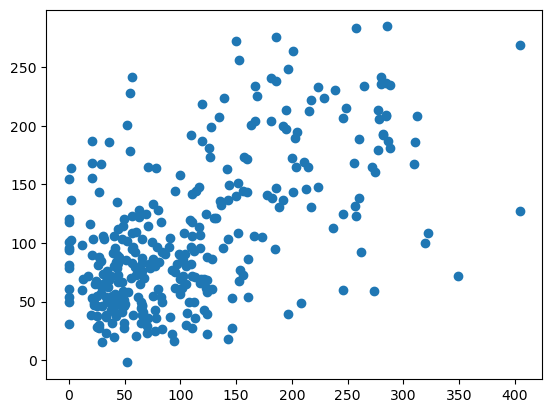

In [44]:
plt.scatter(y_test, prediction)

In [46]:
from sklearn import metrics

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 52.370197956055435
MSE: 4906.124422403586
RMSE: 70.0437322135506
